INFO:root:{'LOG_LEVEL': 'INFO', 'number_of_agents': 10, 'problem': 'Rastrigin', 'problem_size': 90, 'communication_type': 'temp2', 'communication_operator': 'average', 'max_time': 800, 'enable_plots': True, 'trust': 'global', 'population size': 5, 'offspring size': 15}
INFO:root:Socjo started
Progress: 216005it [03:17, 1091.20it/s]                            
INFO:root:Socjo finished in 4.91099404891332
Progress: 216005it [00:18, 11630.88it/s]                            
INFO:root:comparison finished in 4.5215897043546045
INFO:root:best socjo 76.32412545972487 best single 28.59760714630154


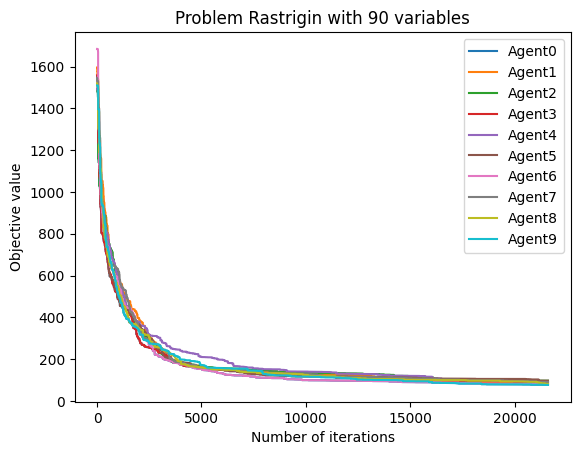

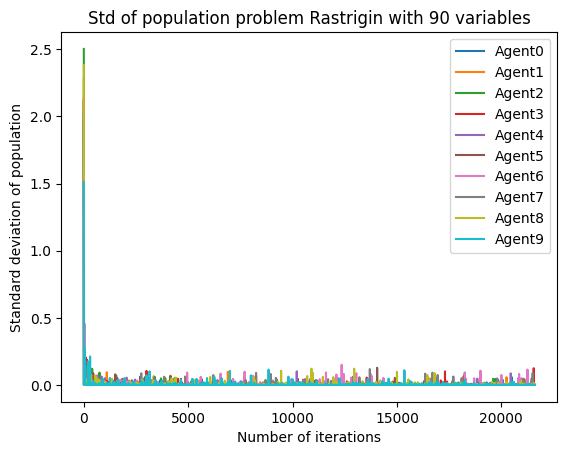

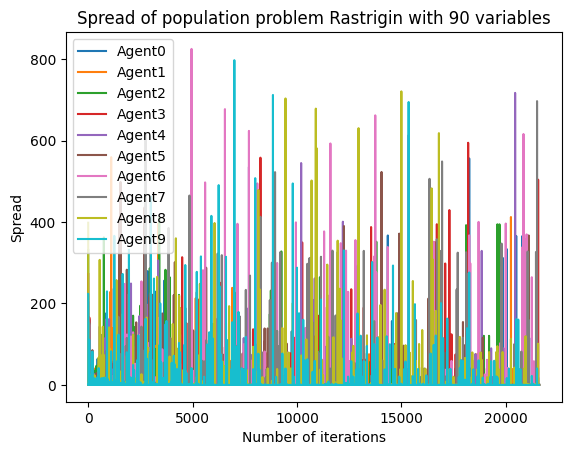

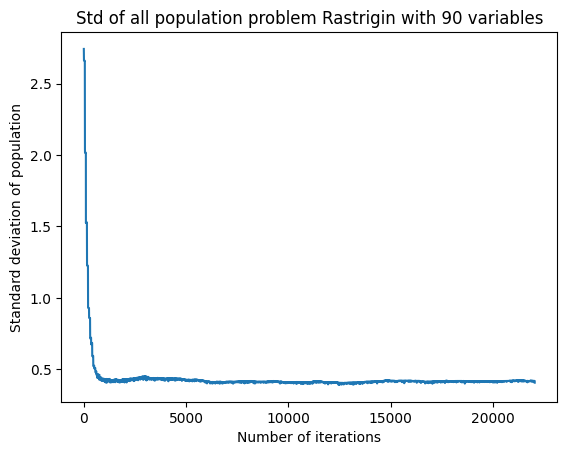

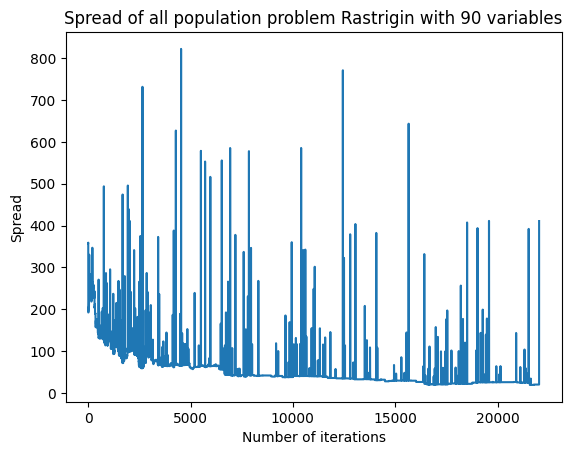

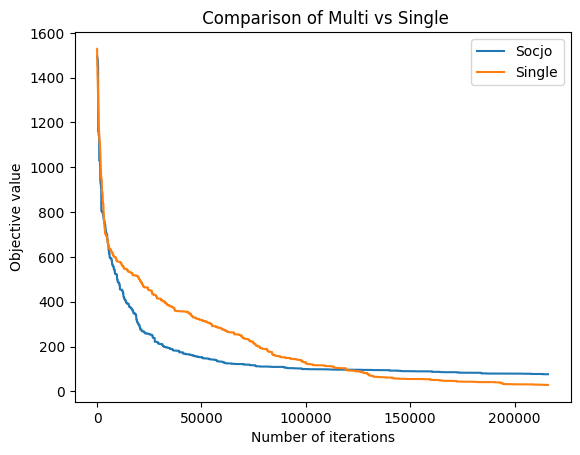

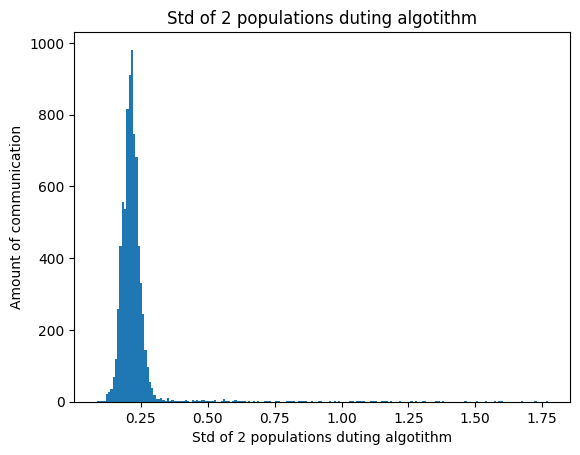

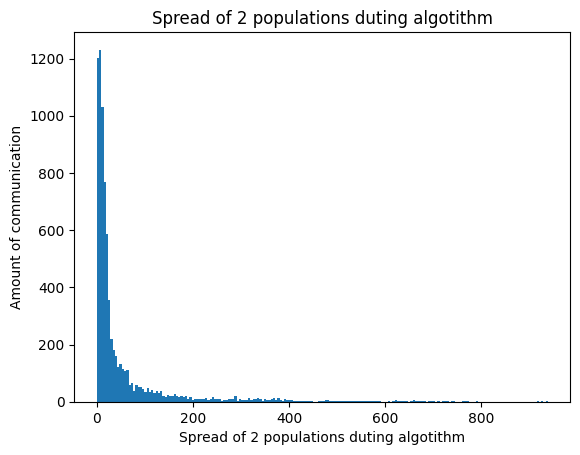

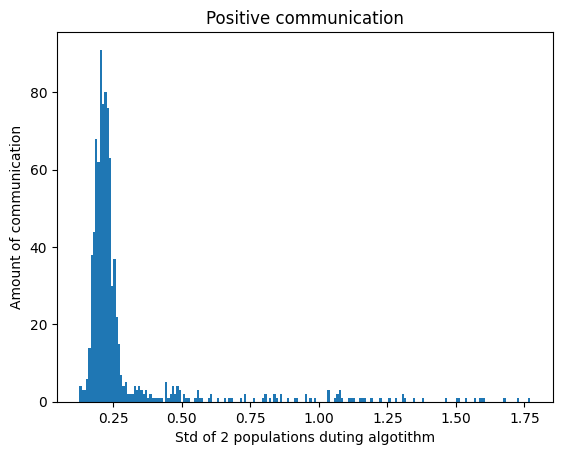

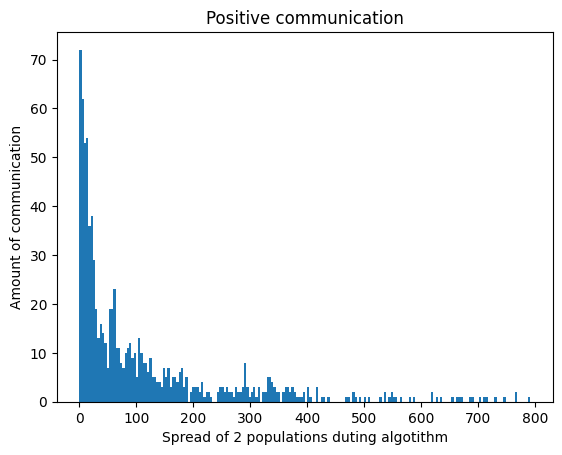

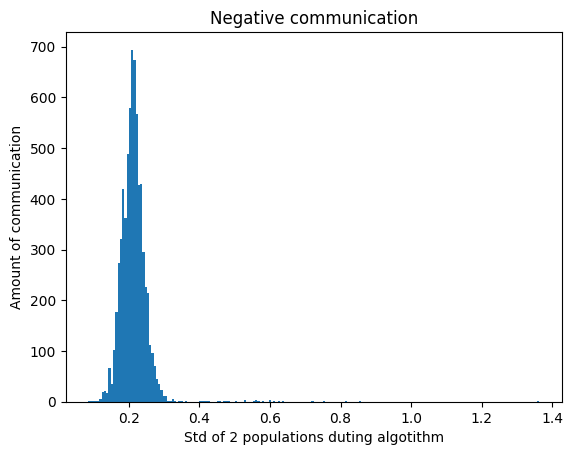

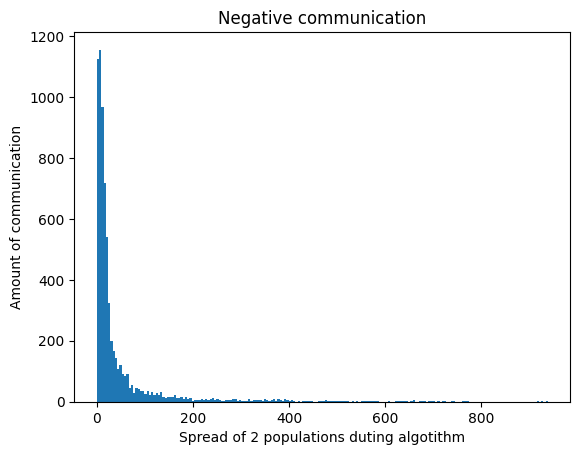

INFO:root:plotting finished in 0.07499884366989136
INFO:root:Run 0 out of 3
INFO:root:Socjo started
INFO:root:Socjo finished in 4.85250144402186
INFO:root:comparison finished in 4.52097536722819
INFO:root:best socjo 64.21983587778882 best single 23.28487123722687


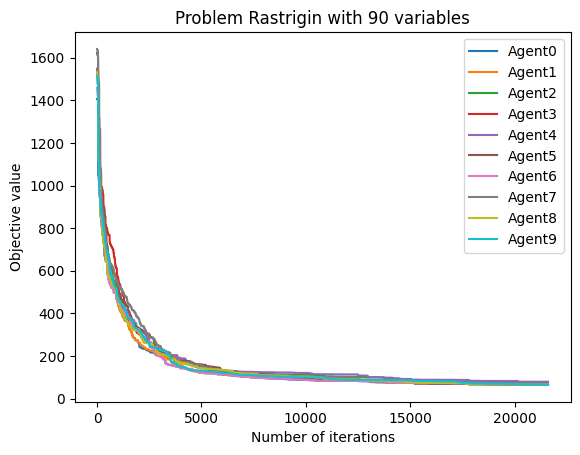

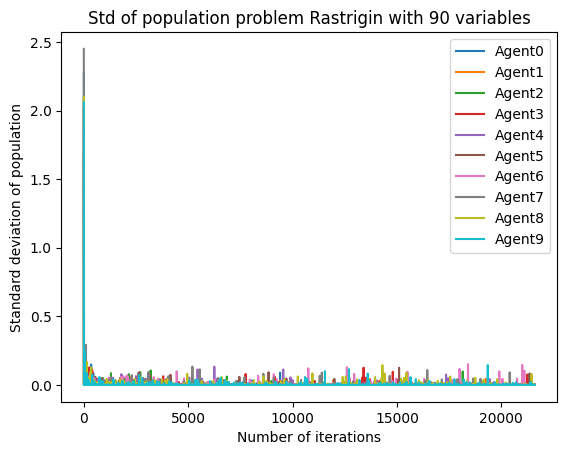

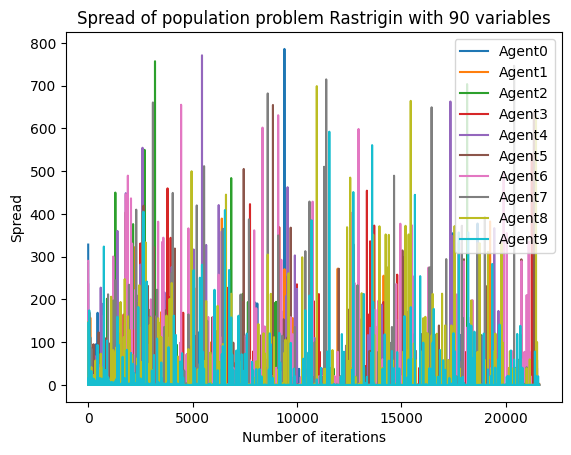

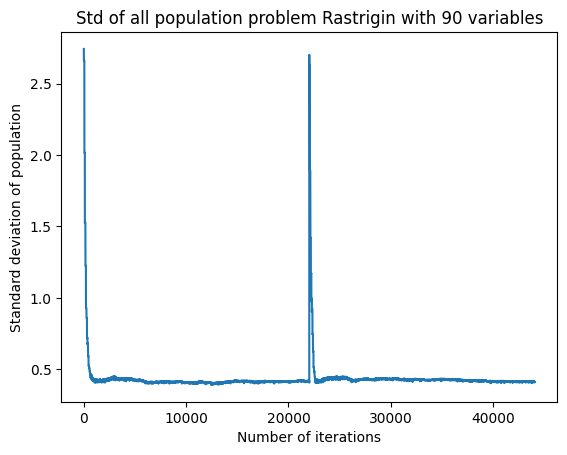

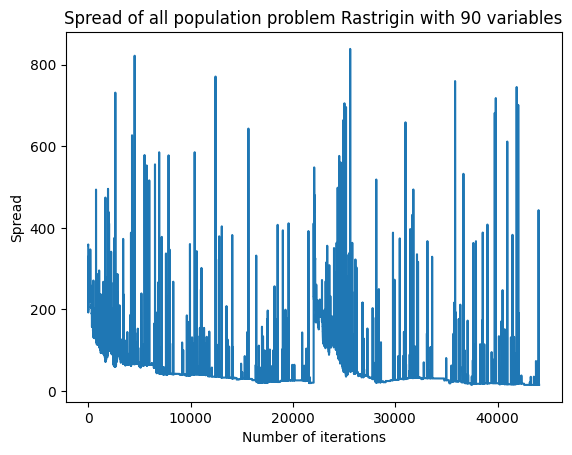

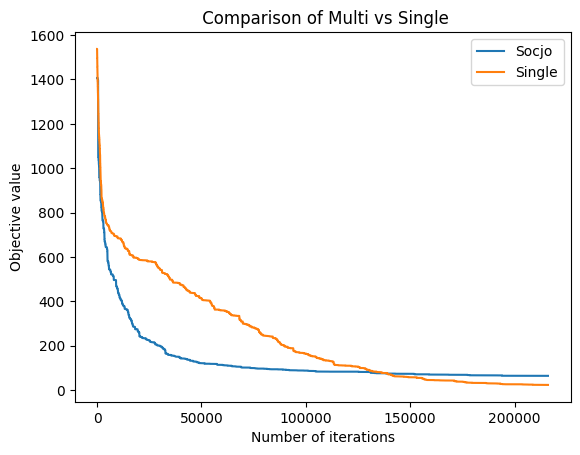

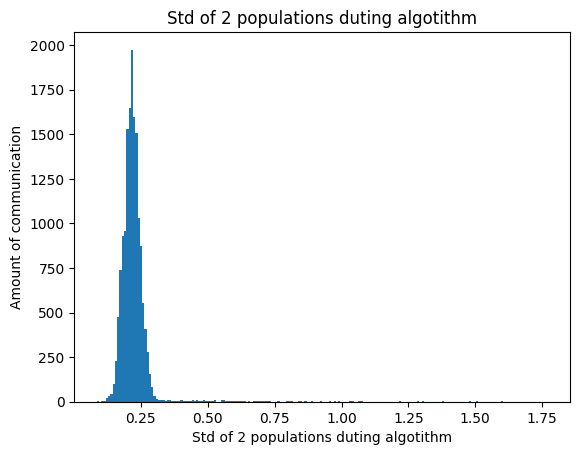

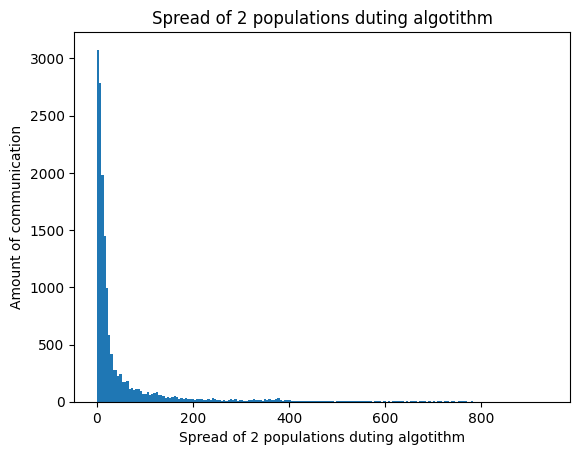

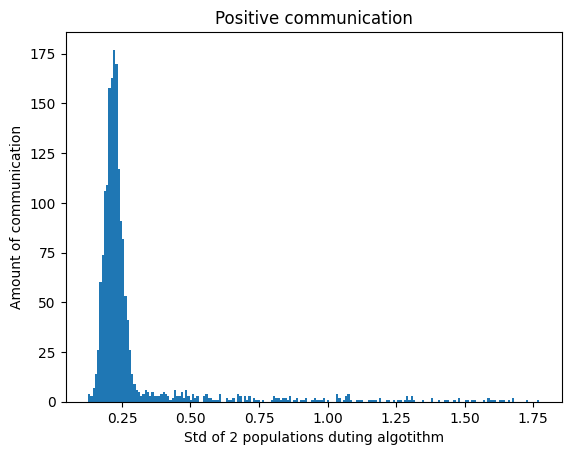

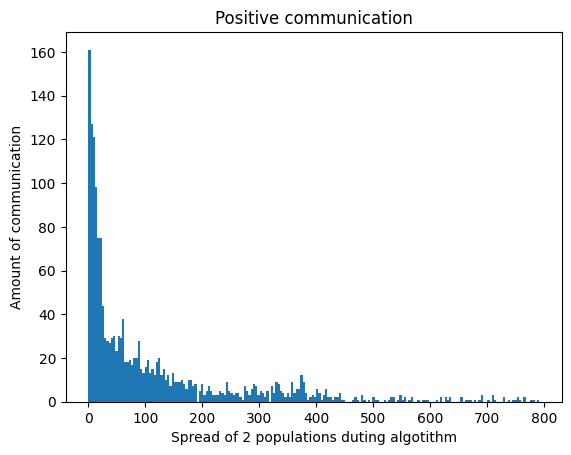

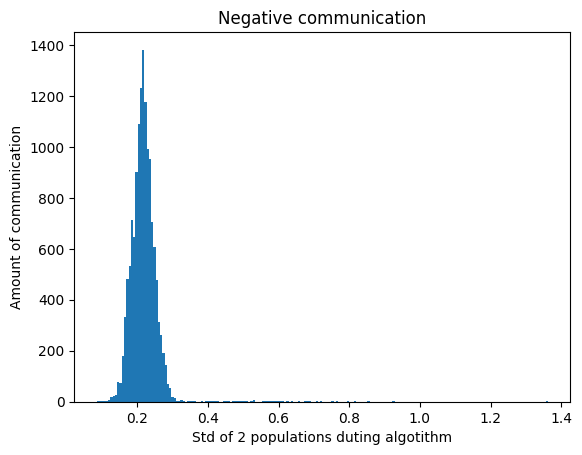

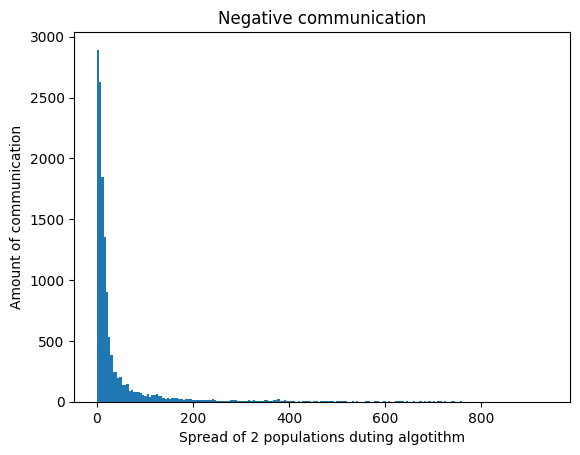

INFO:root:plotting finished in 0.07094427347183227
INFO:root:Run 1 out of 3
INFO:root:Socjo started
INFO:root:Socjo finished in 4.836925995349884
INFO:root:comparison finished in 4.5123485922813416
INFO:root:best socjo 74.8308978065788 best single 24.98572468837657


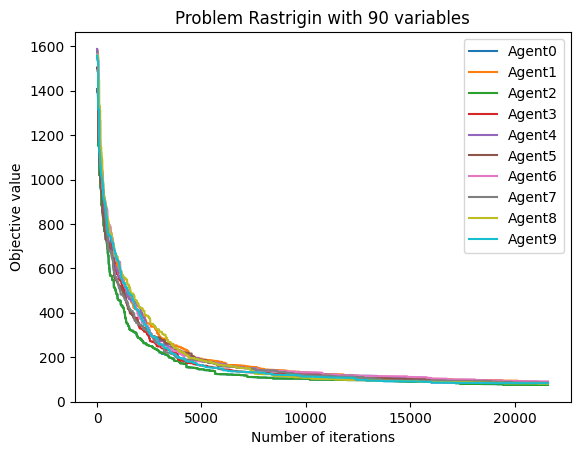

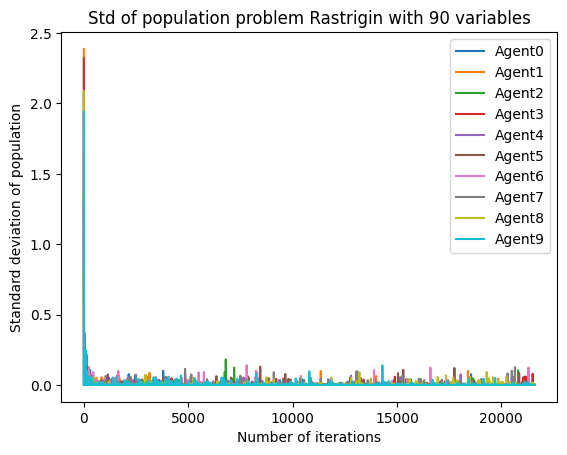

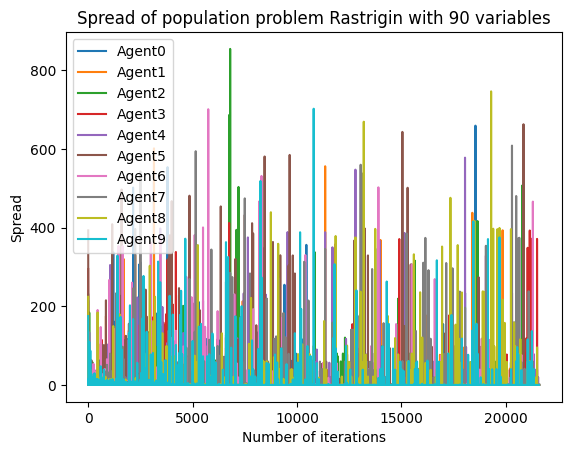

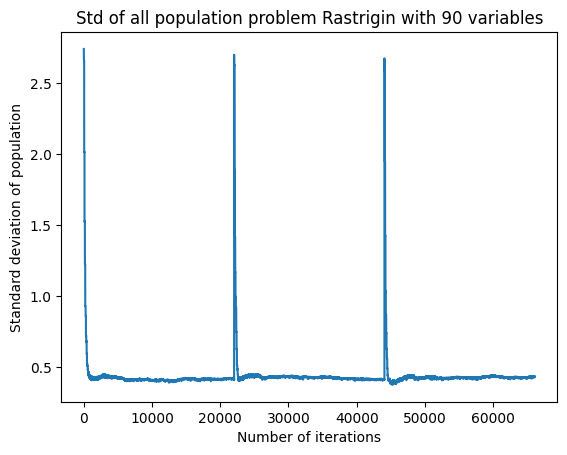

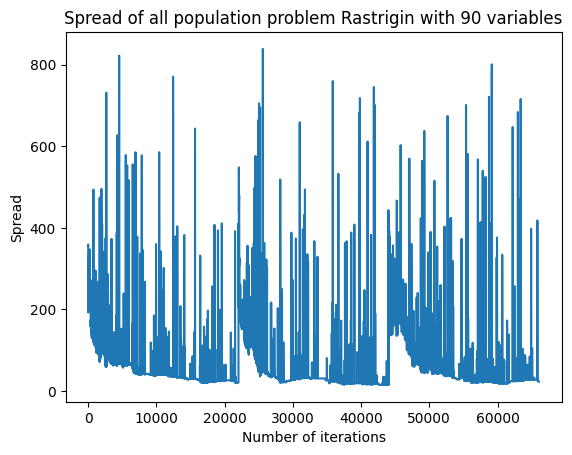

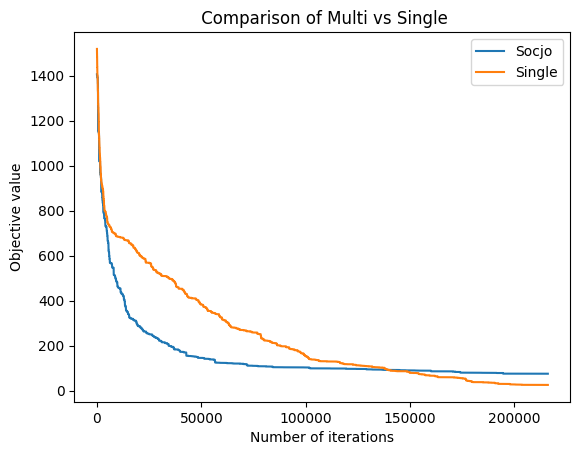

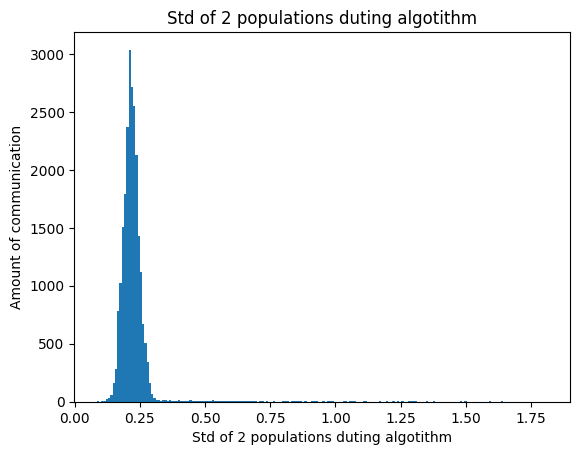

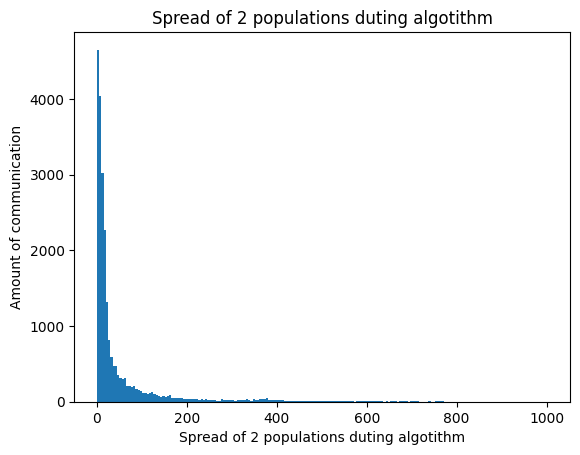

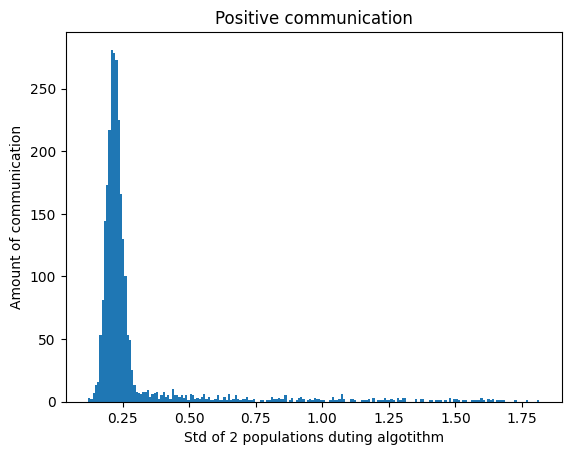

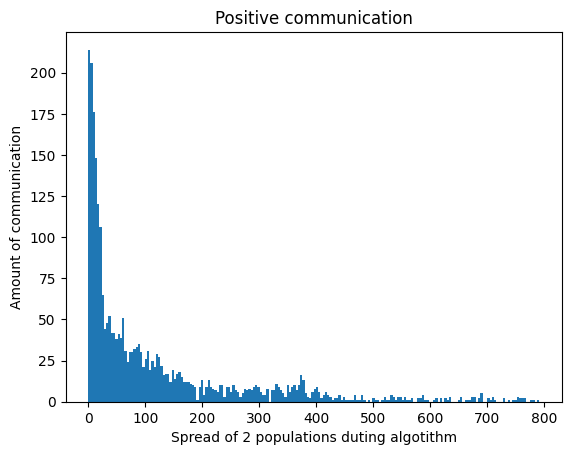

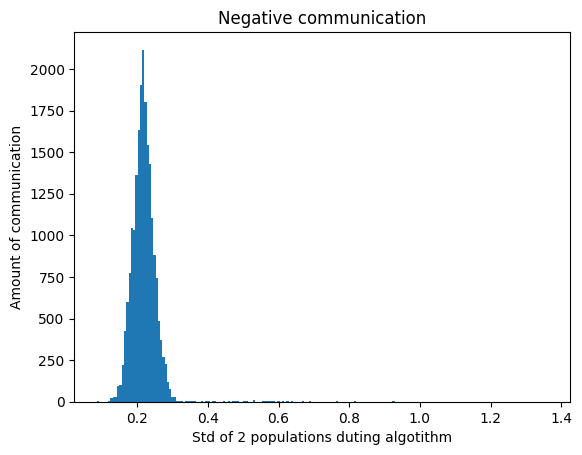

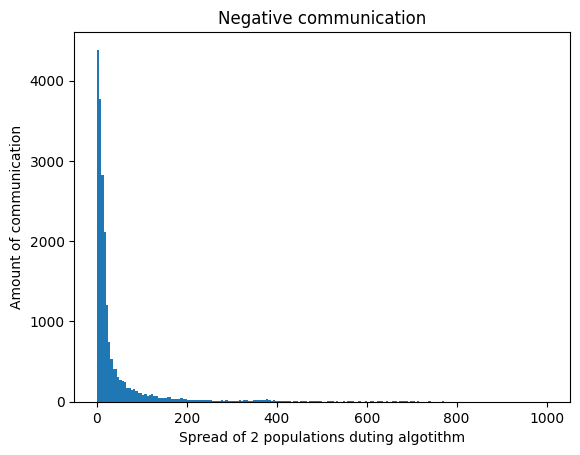

INFO:root:plotting finished in 0.07187374830245971
INFO:root:Run 2 out of 3


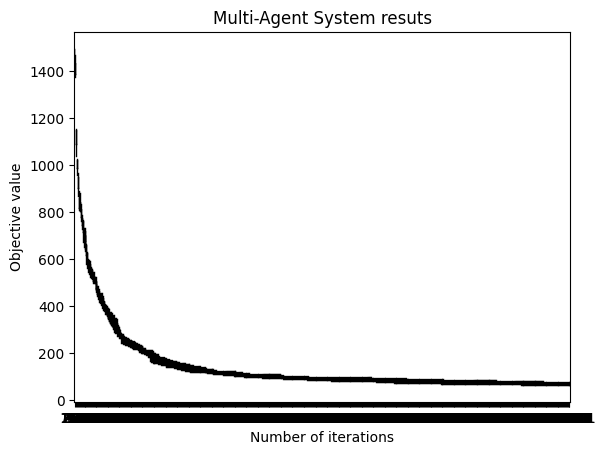

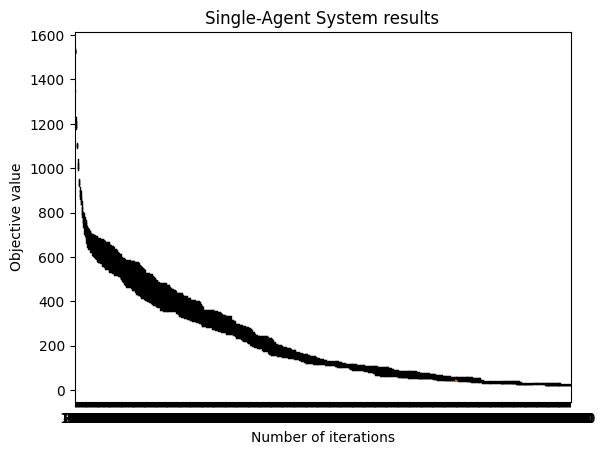

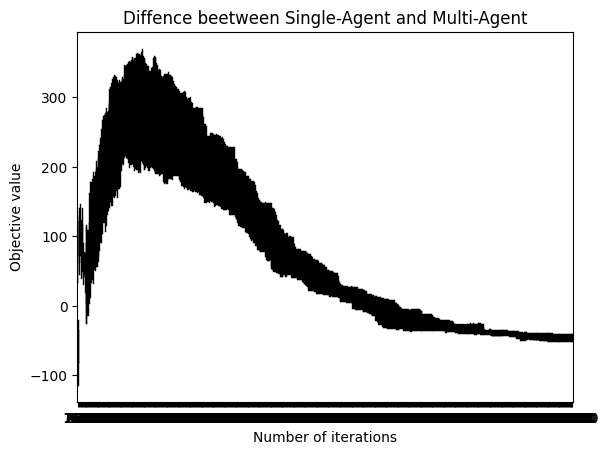

INFO:root:{'LOG_LEVEL': 'INFO', 'number_of_agents': 10, 'problem': 'Griewank', 'problem_size': 90, 'communication_type': 'temp2', 'communication_operator': 'average', 'max_time': 800, 'enable_plots': True, 'trust': 'global', 'population size': 5, 'offspring size': 15}
INFO:root:Socjo started
Progress: 162005it [02:40, 1010.30it/s]                            
INFO:root:Socjo finished in 3.9587281664212544
Progress: 162005it [00:15, 10693.96it/s]                            
INFO:root:comparison finished in 3.6261253794034323
INFO:root:best socjo 0.1333159502957798 best single 0.09915242195424379


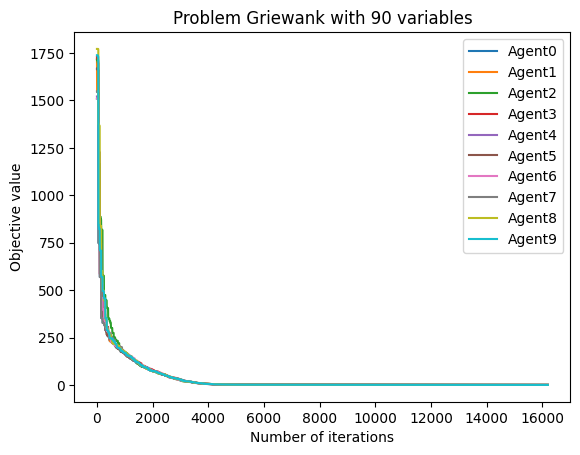

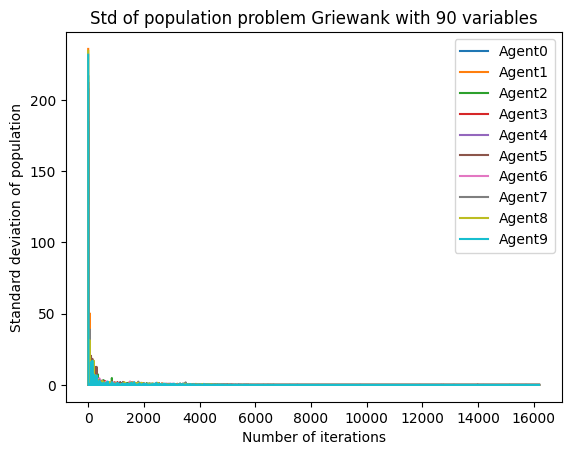

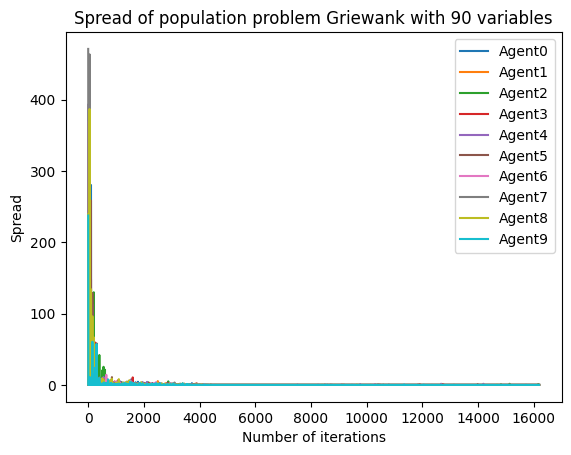

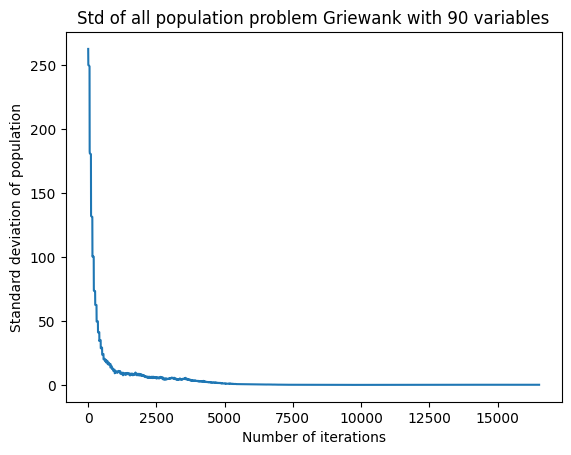

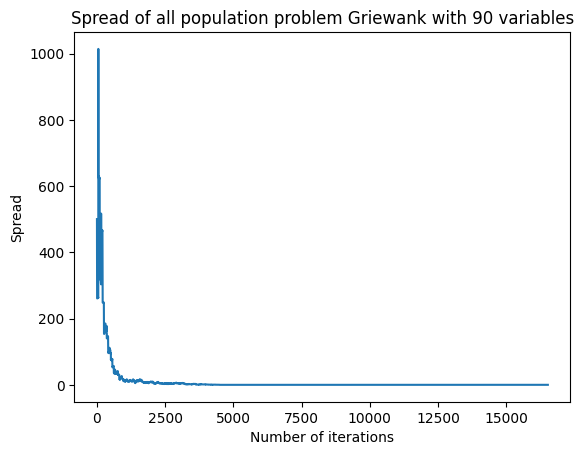

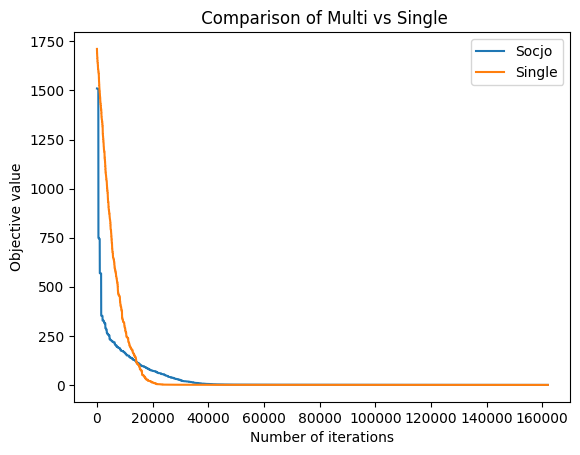

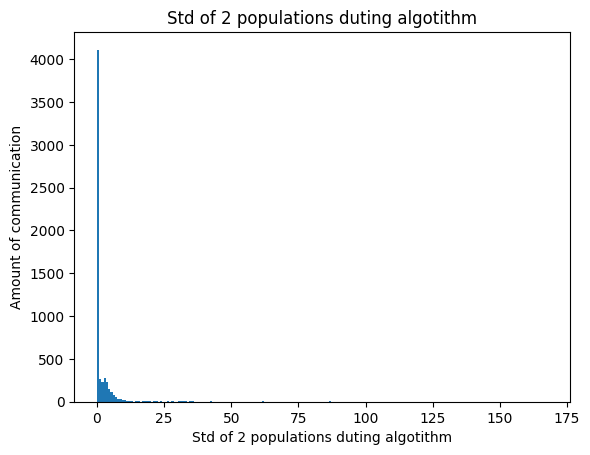

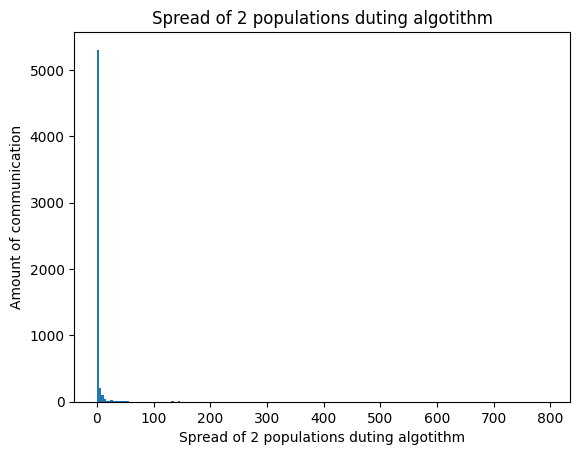

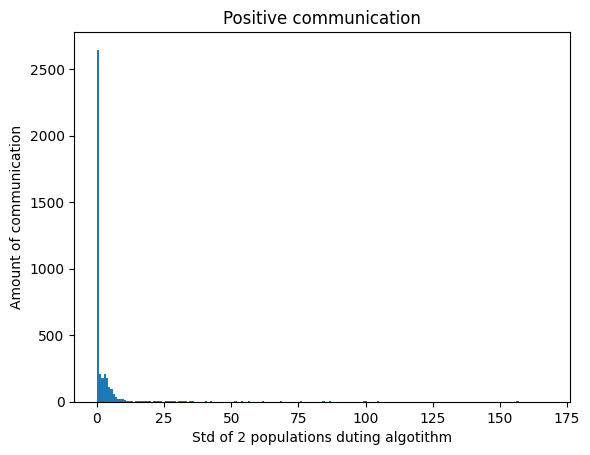

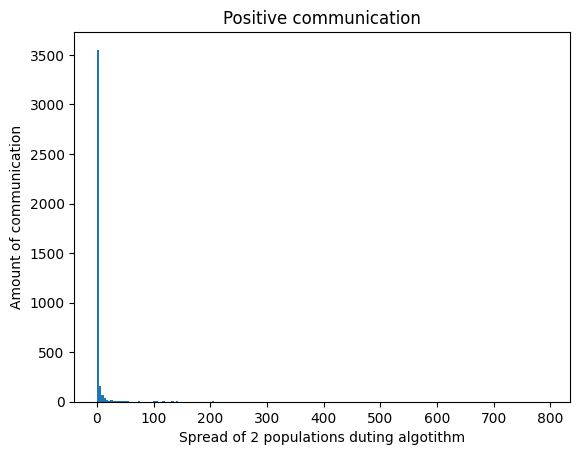

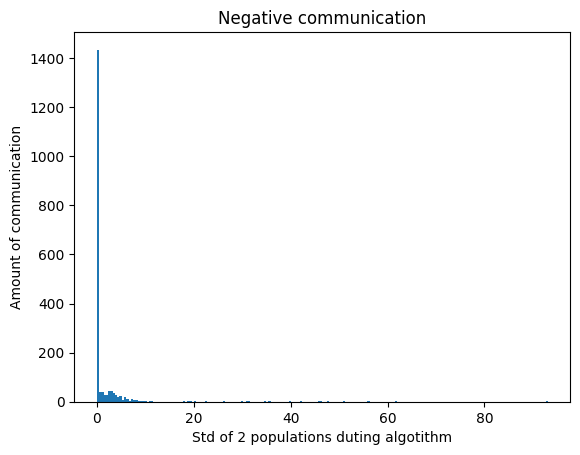

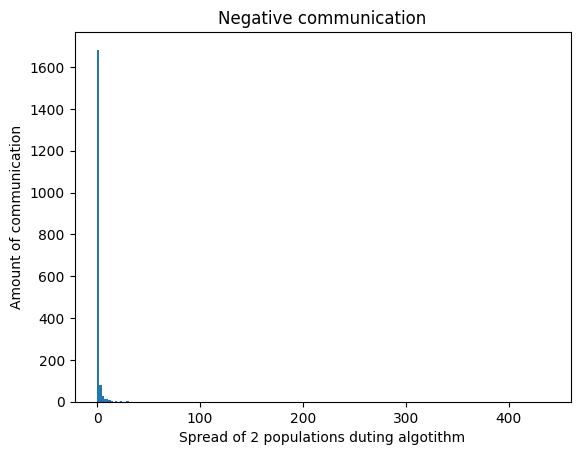

INFO:root:plotting finished in 0.06411009629567464
INFO:root:Run 0 out of 3
INFO:root:Socjo started
INFO:root:Socjo finished in 3.8756079276402793
INFO:root:comparison finished in 3.6441884636878967
INFO:root:best socjo 0.1698707390402181 best single 0.032885151743332064


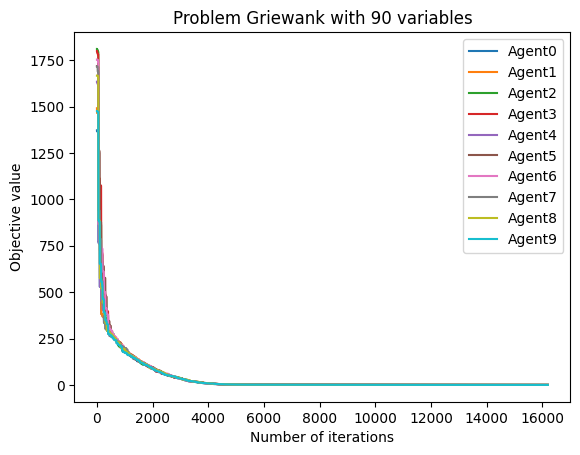

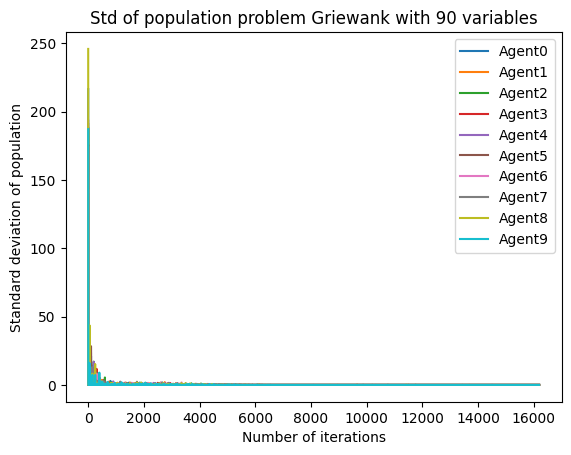

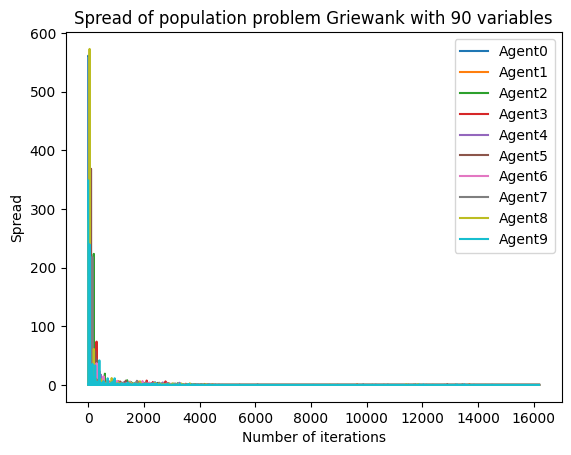

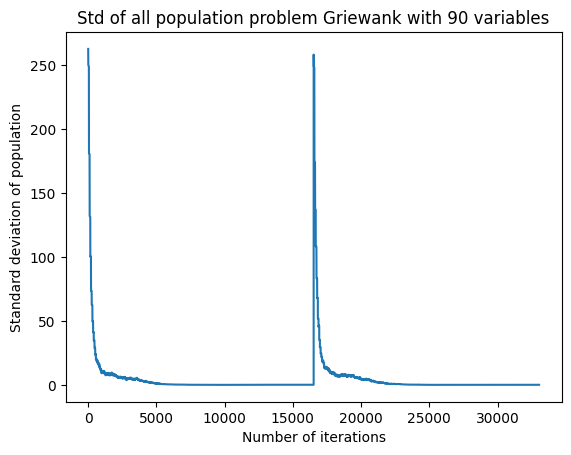

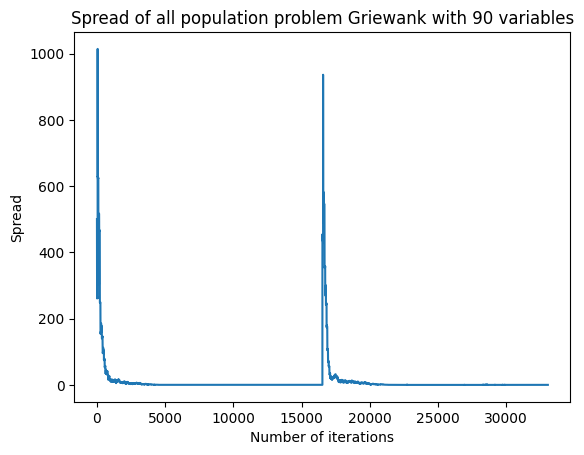

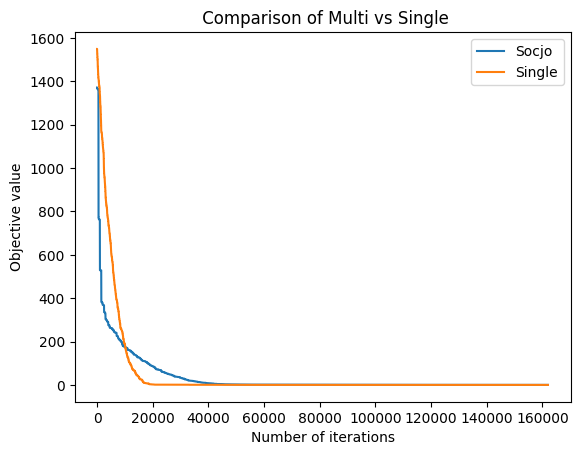

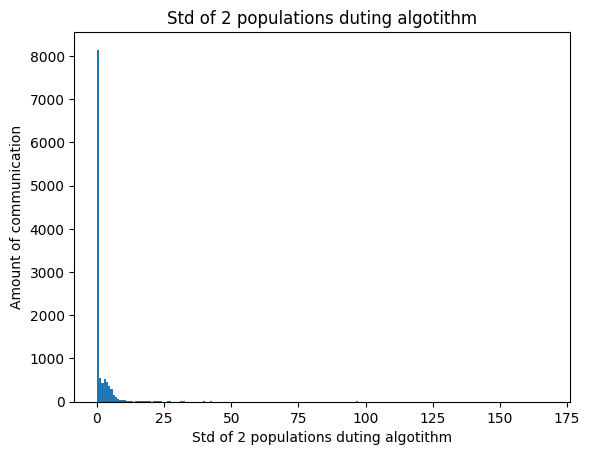

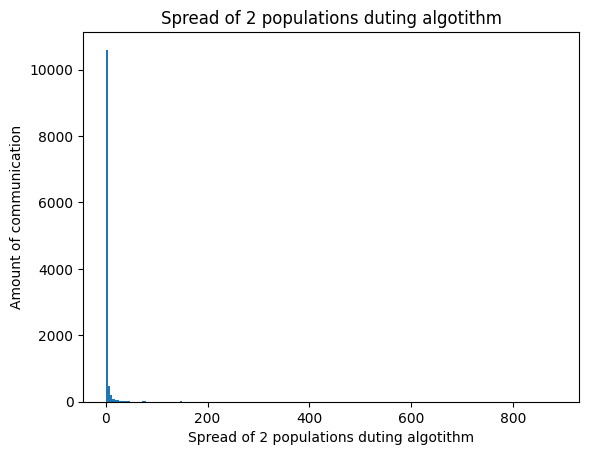

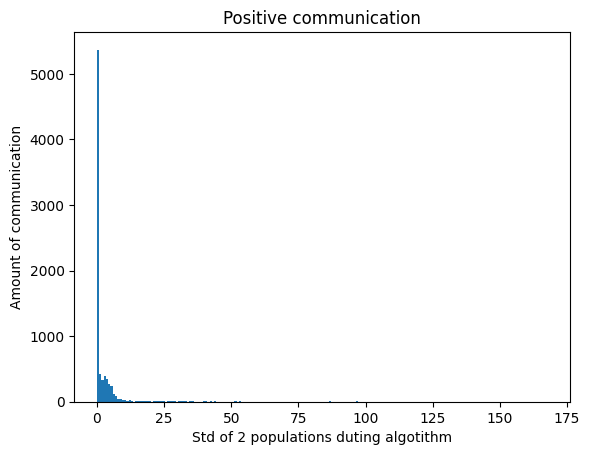

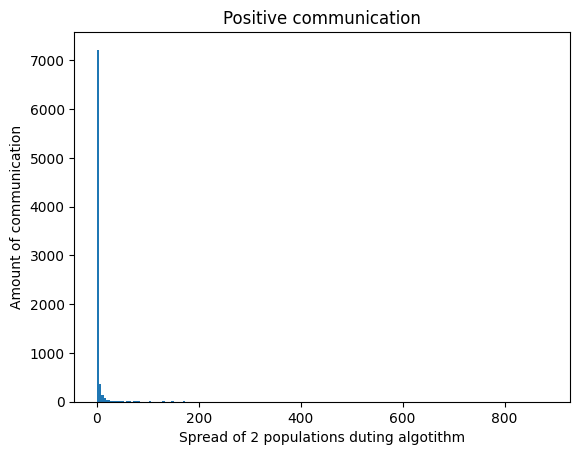

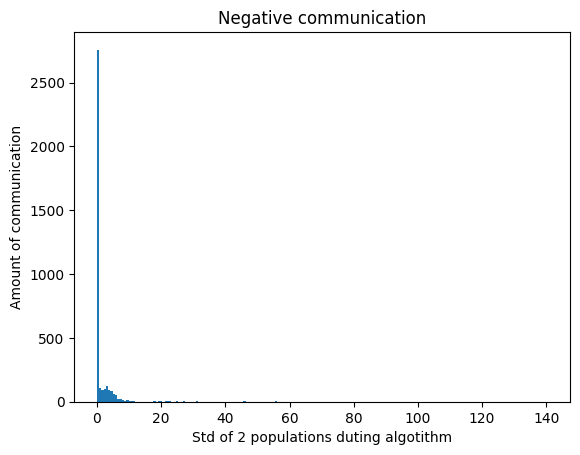

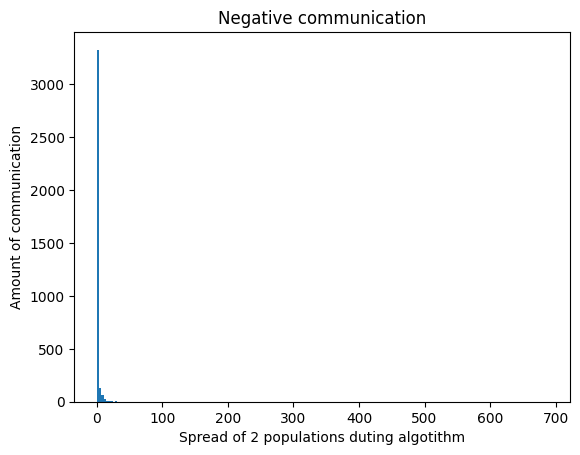

INFO:root:plotting finished in 0.057577474912007647
INFO:root:Run 1 out of 3
INFO:root:Socjo started
INFO:root:Socjo finished in 3.8933721741040546
INFO:root:comparison finished in 3.6450007716814676
INFO:root:best socjo 0.16055165073512212 best single 0.041721787382006825


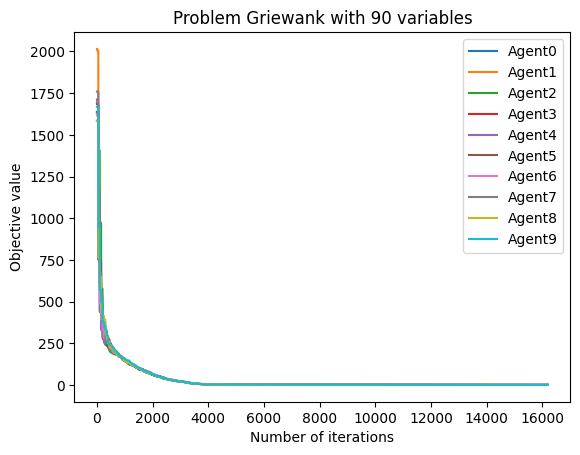

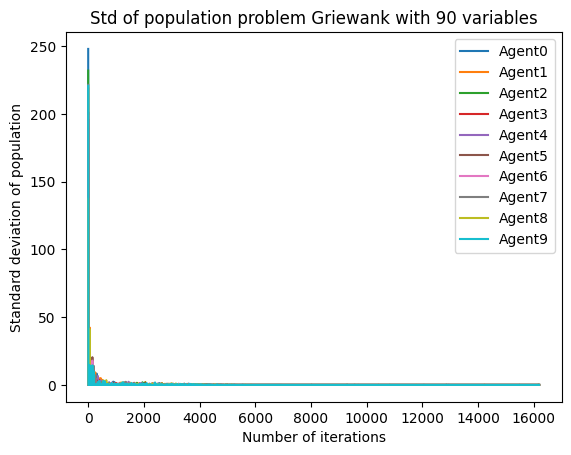

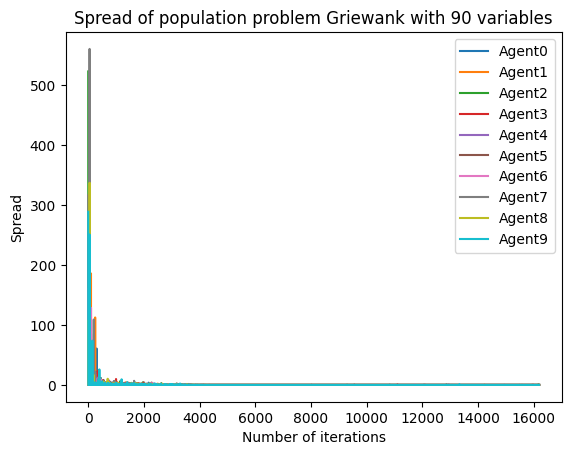

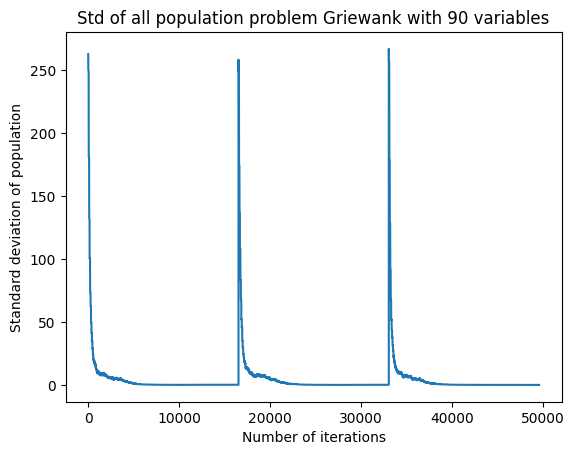

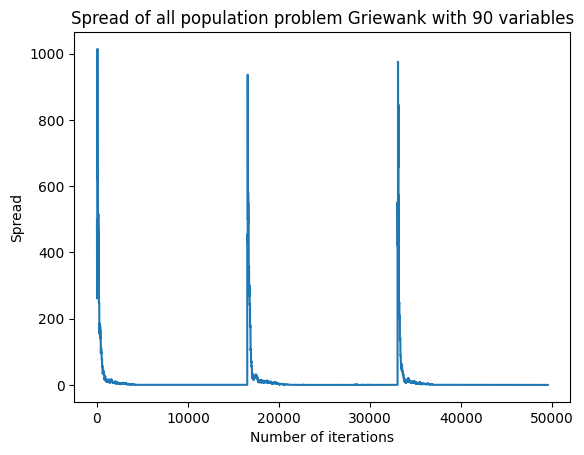

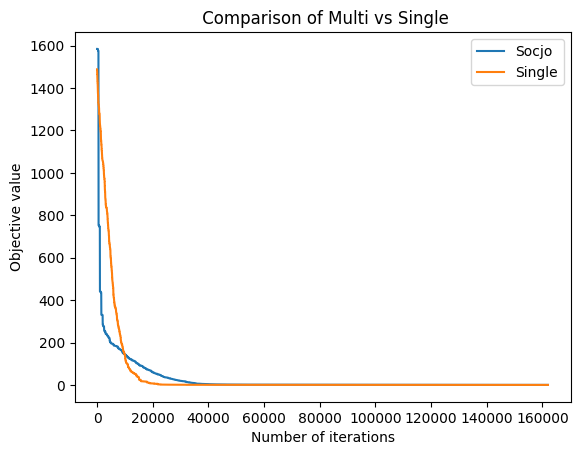

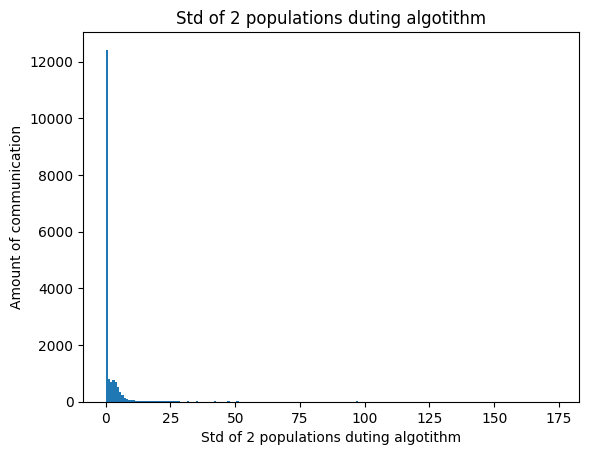

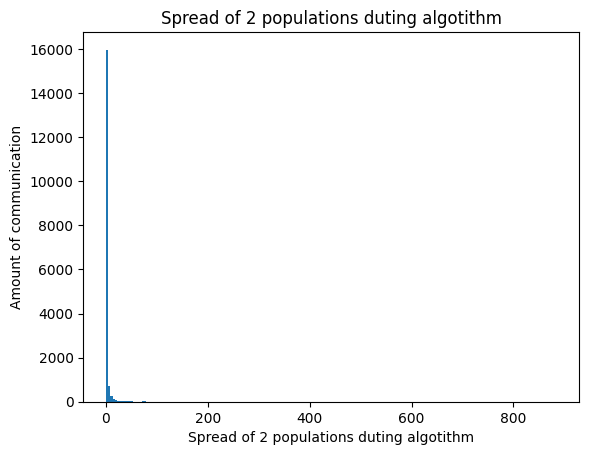

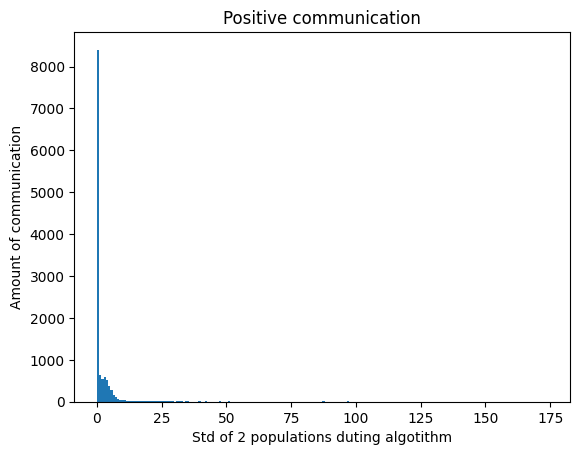

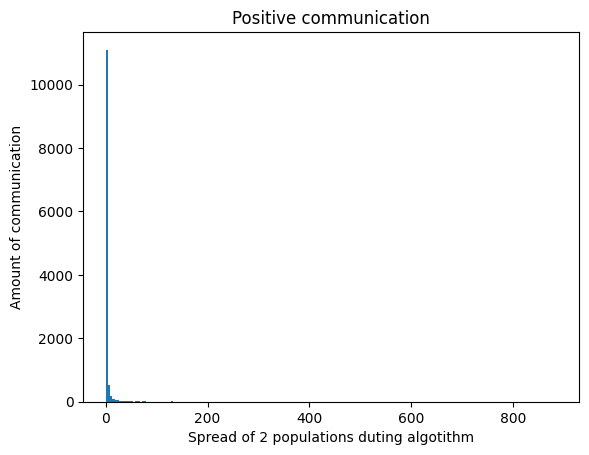

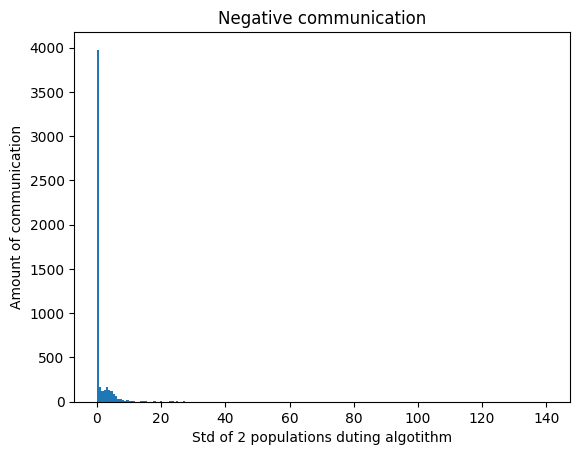

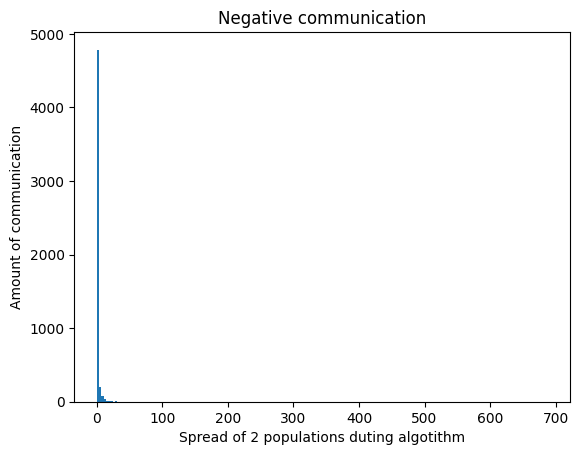

INFO:root:plotting finished in 0.057750054200490314
INFO:root:Run 2 out of 3


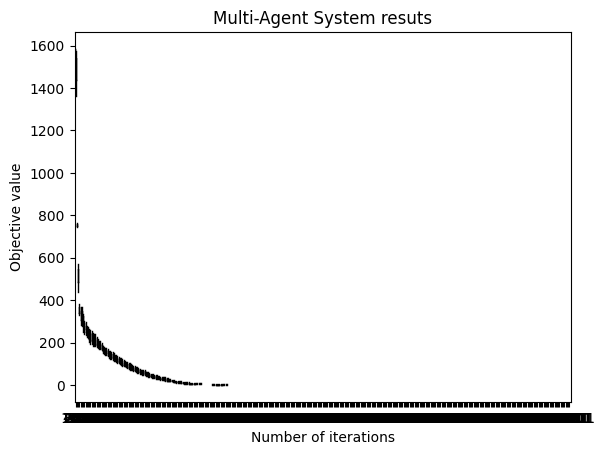

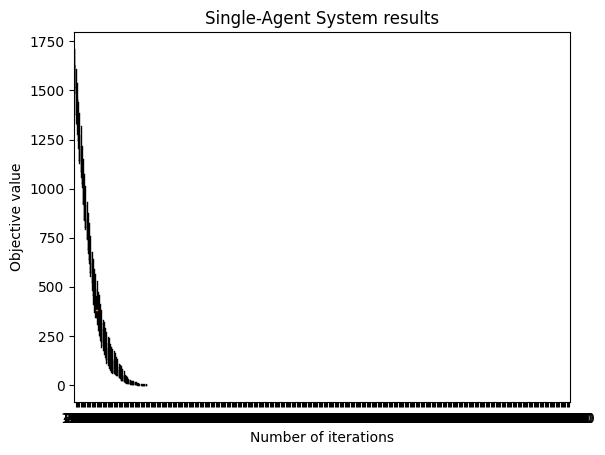

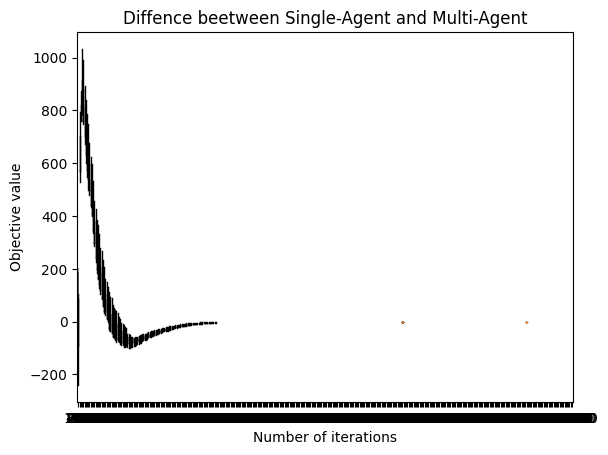

INFO:root:{'LOG_LEVEL': 'INFO', 'number_of_agents': 10, 'problem': 'Ackley', 'problem_size': 90, 'communication_type': 'temp2', 'communication_operator': 'average', 'max_time': 800, 'enable_plots': True, 'trust': 'global', 'population size': 5, 'offspring size': 15}
INFO:root:Socjo started
Progress: 108005it [01:34, 1146.65it/s]                            
INFO:root:Socjo finished in 2.3268911520640057
Progress: 108005it [00:08, 12329.62it/s]                            
INFO:root:comparison finished in 2.1171552101771036
INFO:root:best socjo 0.5017340536965702 best single 0.25132730647152757


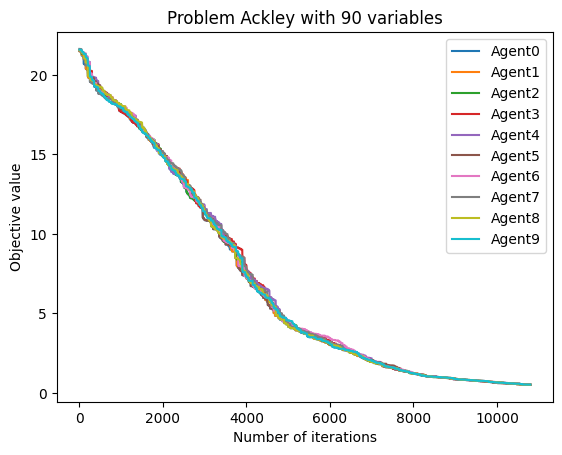

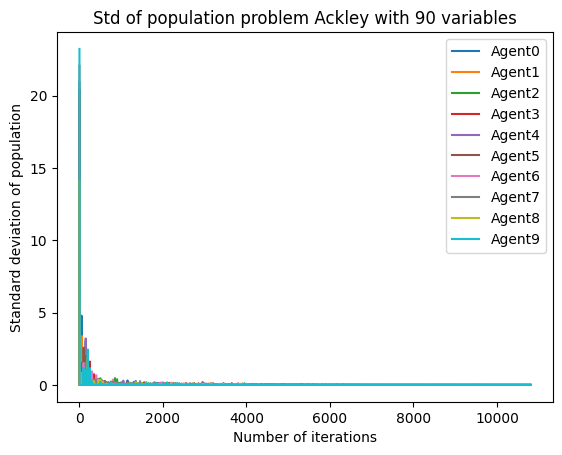

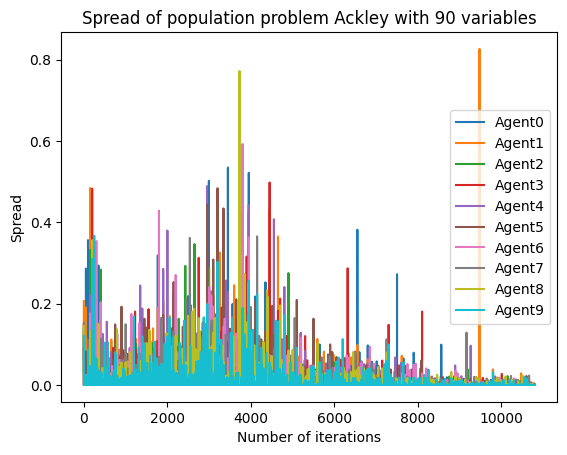

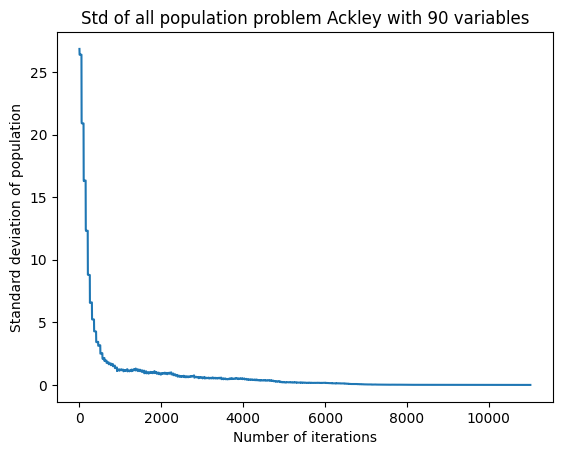

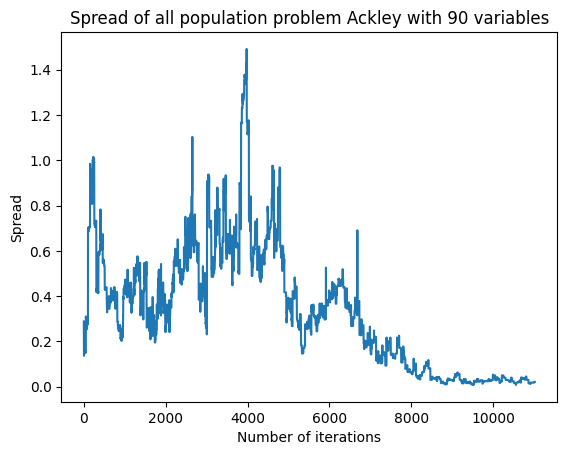

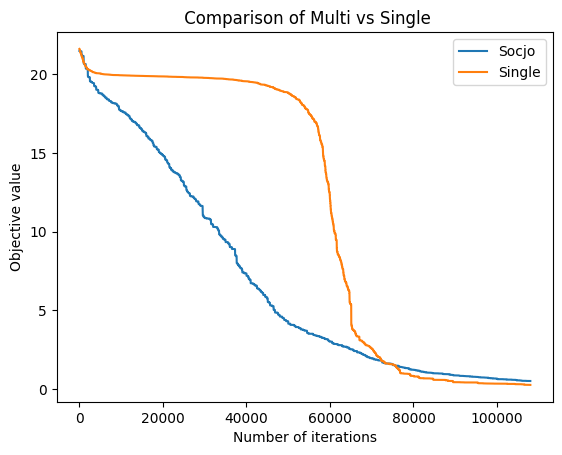

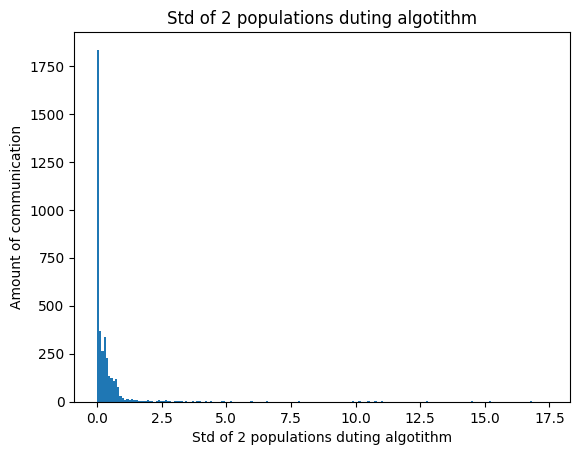

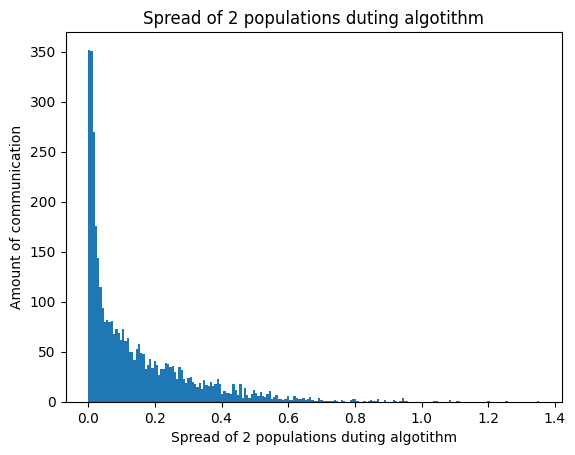

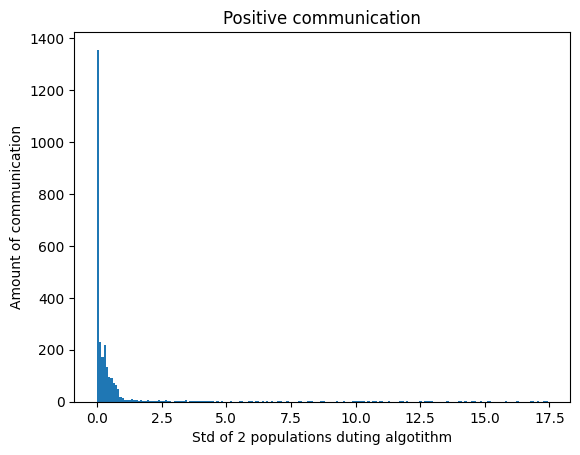

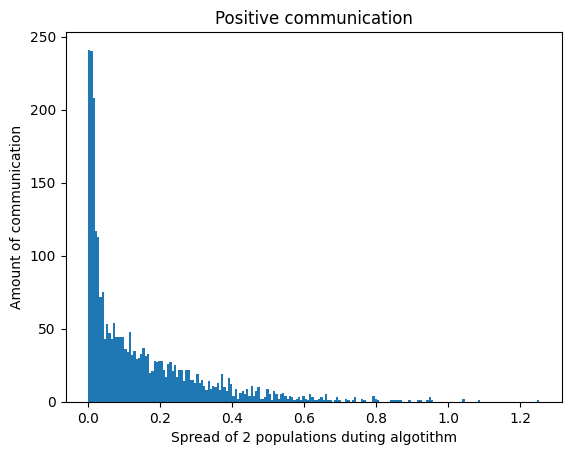

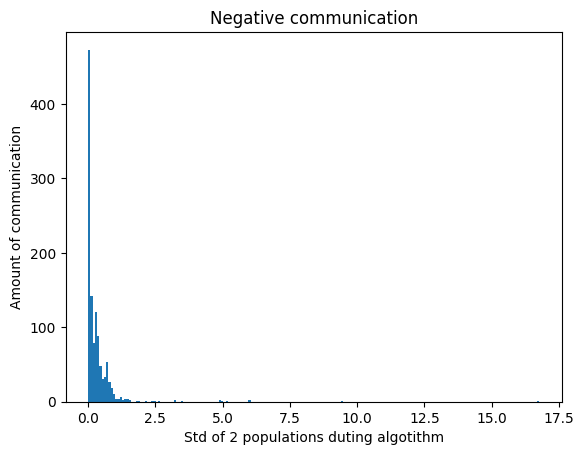

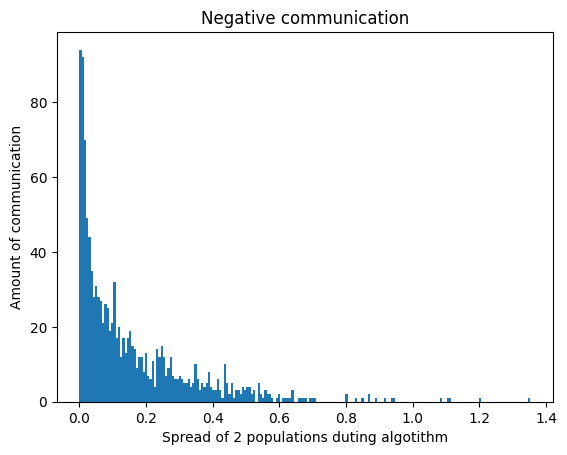

INFO:root:plotting finished in 0.07204336722691854
INFO:root:Run 0 out of 3
INFO:root:Socjo started
INFO:root:Socjo finished in 2.2650638699531553
INFO:root:comparison finished in 2.109844994544983
INFO:root:best socjo 0.49942964485548247 best single 0.31402128847224775


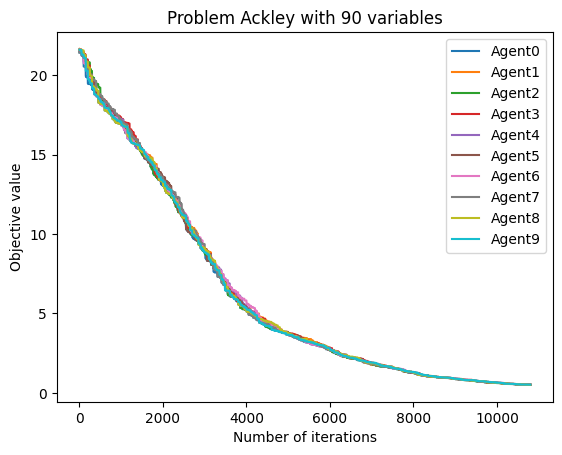

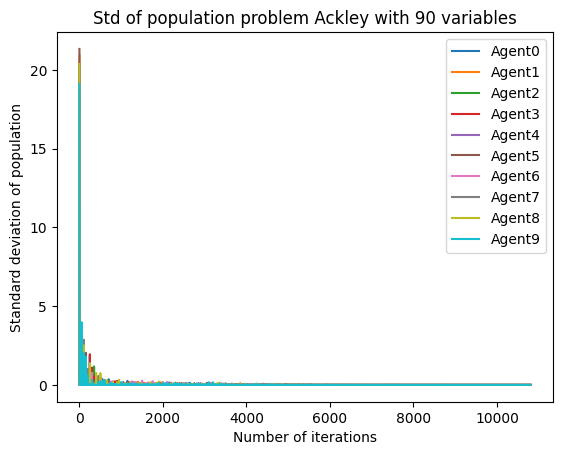

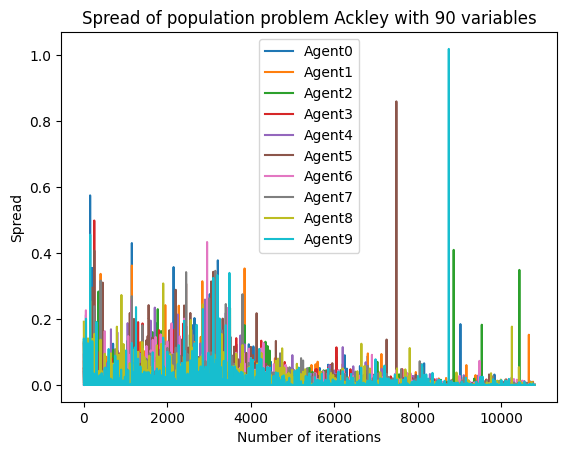

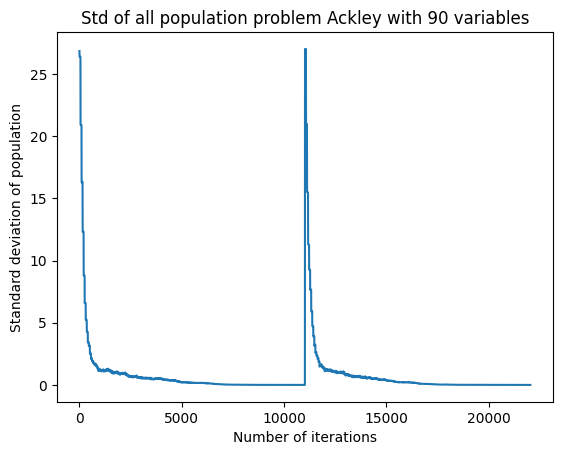

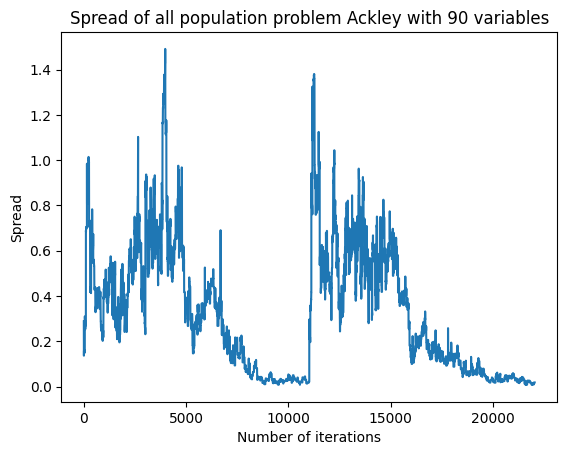

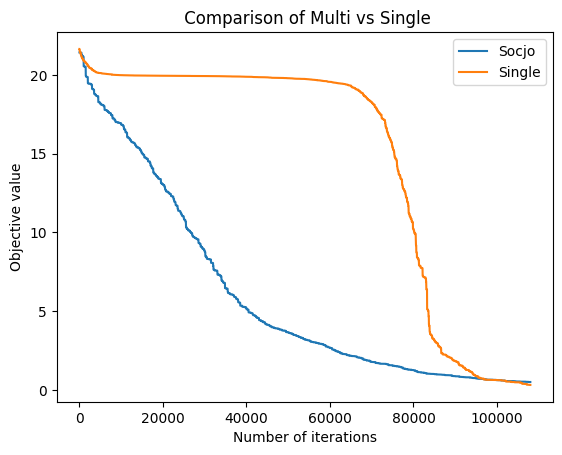

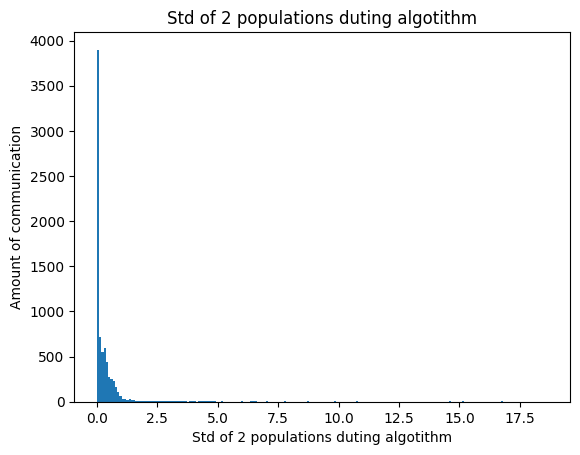

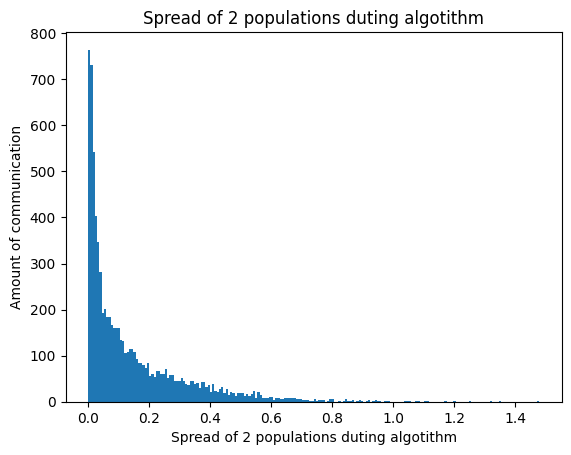

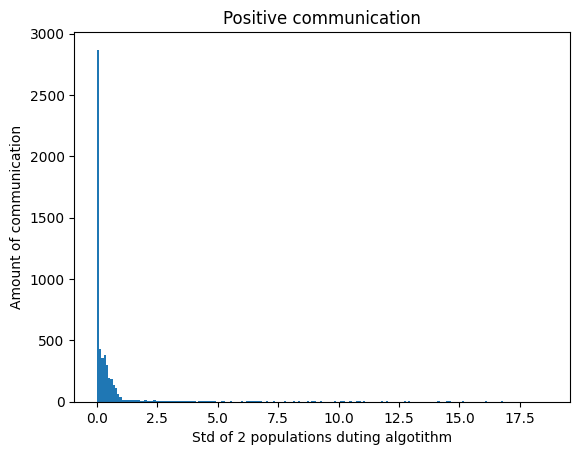

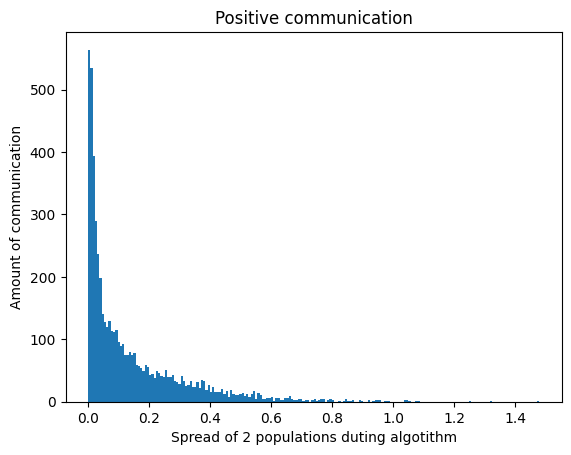

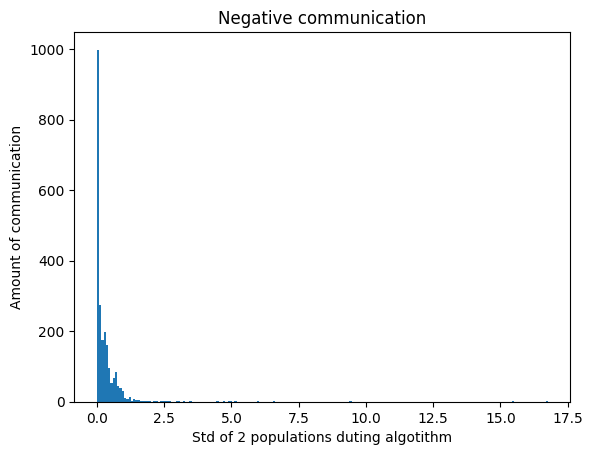

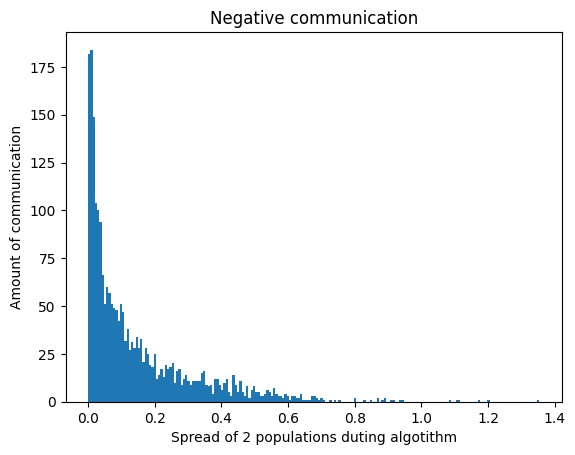

INFO:root:plotting finished in 0.06964298486709594
INFO:root:Run 1 out of 3
INFO:root:Socjo started
INFO:root:Socjo finished in 2.2661961992581685
INFO:root:comparison finished in 2.10715252161026
INFO:root:best socjo 0.5529047225250712 best single 1.0104534533364498


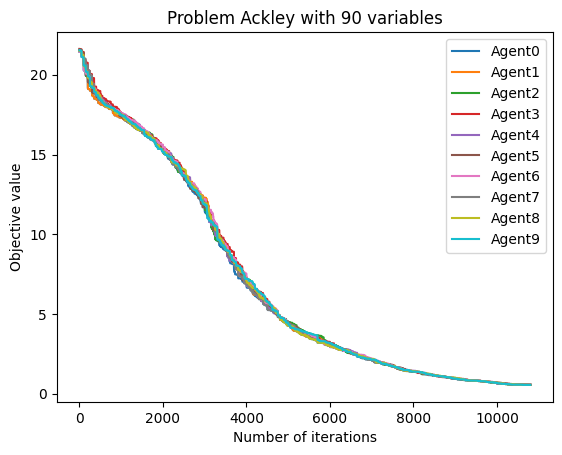

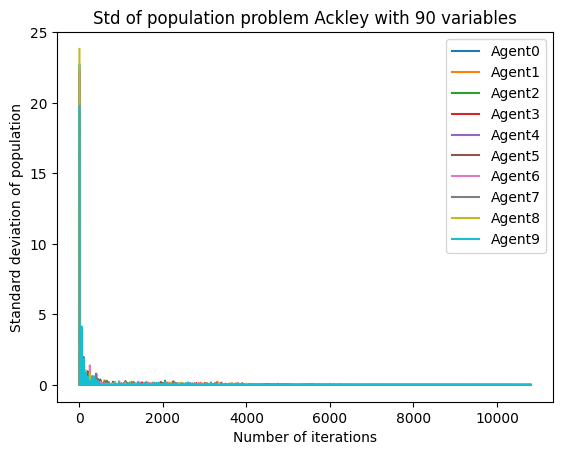

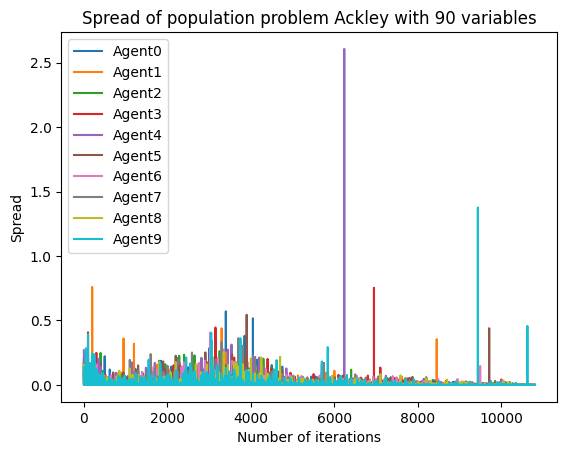

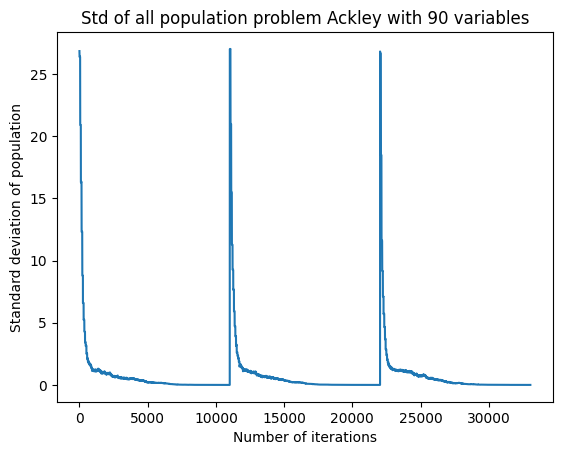

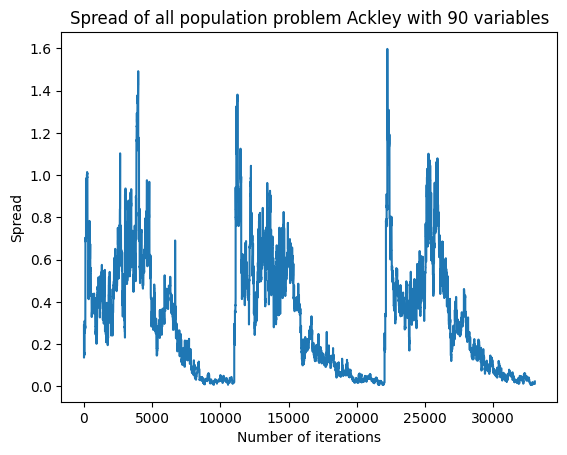

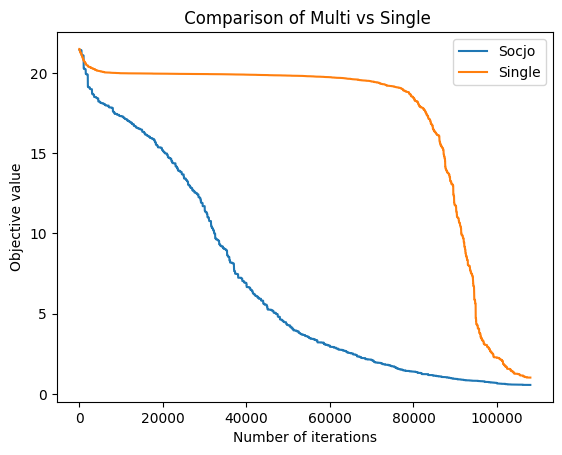

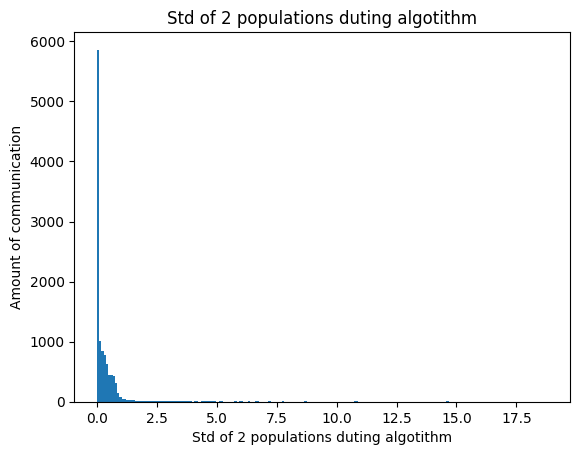

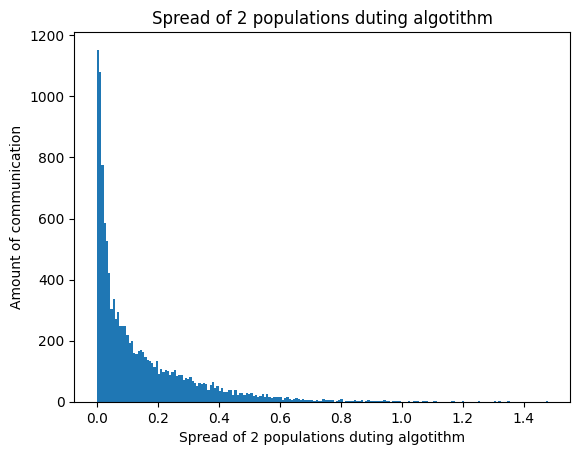

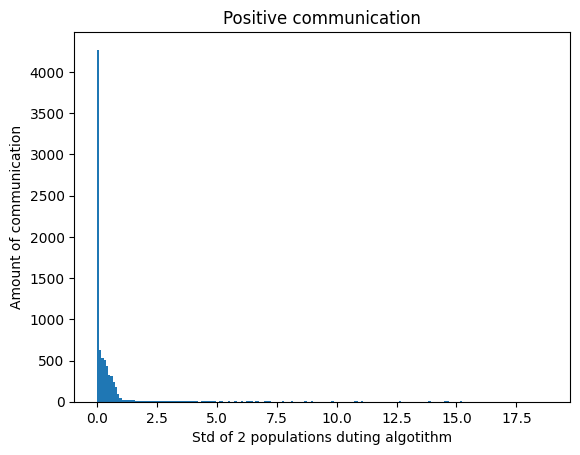

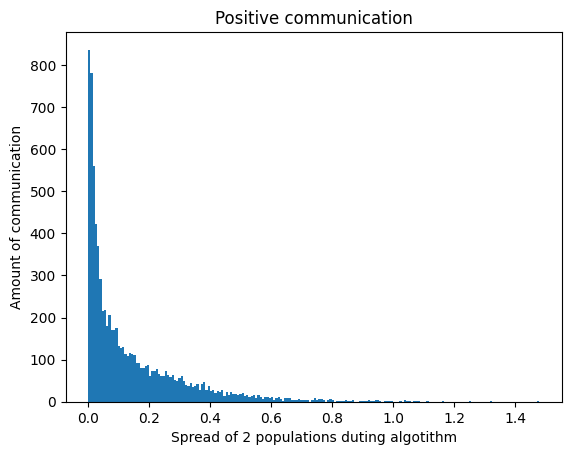

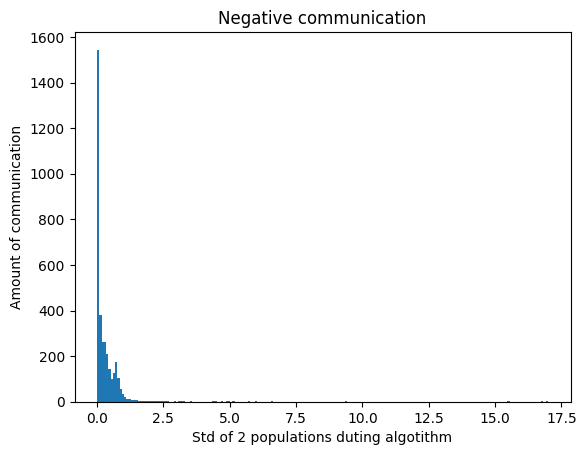

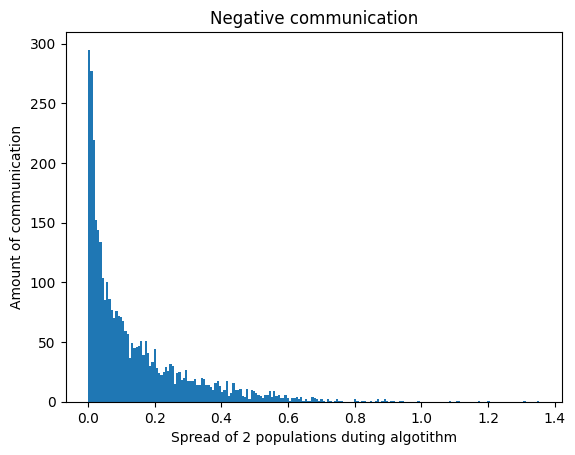

INFO:root:plotting finished in 0.06735563278198242
INFO:root:Run 2 out of 3


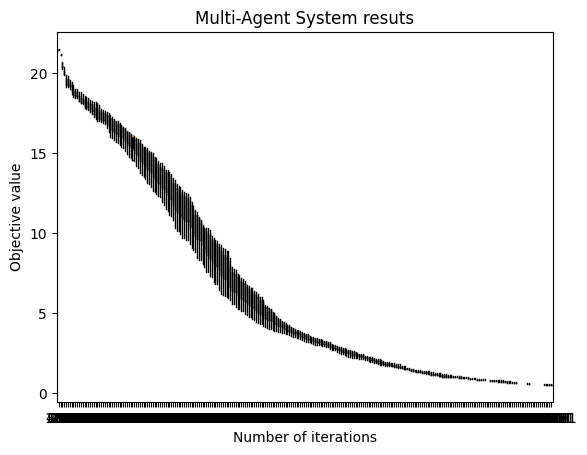

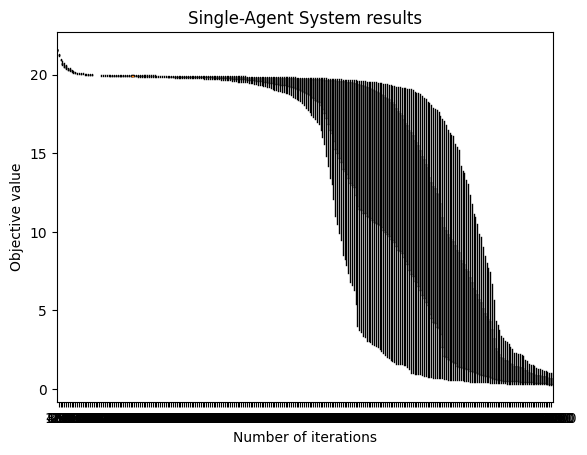

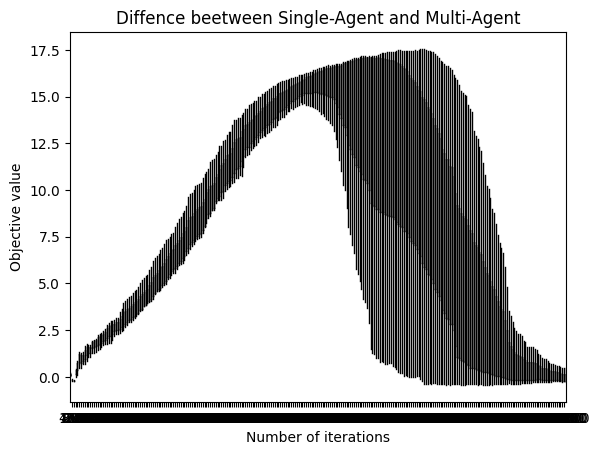

In [1]:
import logging

from inicialization.agents_inicialization import create_agents_float_solution
from settings import Settings
from runners.single import MultiAgentRunner
from runners.statistic import StatisticRunner
from time import time

time1 =  time()
Statistic_runner_list = []
for idx, config in enumerate(["config_R.json","config_G.json", "config_A.json"]):
    with open(config,"r") as f:
        settings = Settings(f)
        # logging.basicConfig(level=settings.log_level)
    logging.basicConfig(level=logging.INFO)
    logging.info(settings.json_settings)
    config = settings.decodeAgentsData()
    iterations = config.problem.number_of_variables * 300 * (8-(idx*2)) 
    Agents, Agent_Reference = create_agents_float_solution(config)     
    runner = MultiAgentRunner(agents= Agents, agent_single= Agent_Reference, max_iterations=iterations)
    Statistic_runner_list.append(StatisticRunner(runner))
    Statistic_runner_list[idx].run_an_collect_data(no_runs = 3, cycles=int(iterations/50/config.noAgents) , cycle_iter=50, num_of_comm=2)
    if settings.enable_plots:
        Statistic_runner_list[idx].plot()

In [18]:
for el in Statistic_runner_list:   
    for i in range (0, len(el.Executor.comunication_history)//1000):

        lista1 = list(filter(lambda hist: hist.result == True, el.Executor.comunication_history[i:i+1000]))
        lista2 = list(filter(lambda hist: hist.result == False, el.Executor.comunication_history[i:i+1000]))
        print(f"{i*1000} - {i+1000} nr komunikacji pozytywna {lista1.__len__()} negatyna {lista2.__len__()}")


0 - 1000 nr komunikacji pozytywna 225 negatyna 775
1000 - 1001 nr komunikacji pozytywna 224 negatyna 776
2000 - 1002 nr komunikacji pozytywna 223 negatyna 777
3000 - 1003 nr komunikacji pozytywna 223 negatyna 777
4000 - 1004 nr komunikacji pozytywna 222 negatyna 778
5000 - 1005 nr komunikacji pozytywna 221 negatyna 779
6000 - 1006 nr komunikacji pozytywna 220 negatyna 780
7000 - 1007 nr komunikacji pozytywna 219 negatyna 781
8000 - 1008 nr komunikacji pozytywna 218 negatyna 782
9000 - 1009 nr komunikacji pozytywna 217 negatyna 783
10000 - 1010 nr komunikacji pozytywna 216 negatyna 784
11000 - 1011 nr komunikacji pozytywna 215 negatyna 785
12000 - 1012 nr komunikacji pozytywna 214 negatyna 786
13000 - 1013 nr komunikacji pozytywna 213 negatyna 787
14000 - 1014 nr komunikacji pozytywna 212 negatyna 788
15000 - 1015 nr komunikacji pozytywna 211 negatyna 789
16000 - 1016 nr komunikacji pozytywna 210 negatyna 790
17000 - 1017 nr komunikacji pozytywna 209 negatyna 791
18000 - 1018 nr komunik

3522
1478
